In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
home_dir = os.environ['HOME'] + '/'

In [2]:
import pyCloudy as pc

warng pyCloudy config: pyCloudy works better with matplotlib Triangulation


In [3]:
# Define verbosity to high level (will print errors, warnings and messages)
pc.log_.level = 3

In [4]:
# The directory in which we will have the model
# You may want to change this to a different place so that the current directory
# will not receive all the Cloudy files.
dir_ = '/tmp/models/'

In [5]:
# Define some parameters of the model:
model_name = 'model_1'
full_model_name = '{0}{1}'.format(dir_, model_name)
dens = 2. #log cm-3
Teff = 45000. #K
qH = 47. #s-1
r_min = 5e17 #cm
dist = 1.26 #kpc

In [6]:
# these are the commands common to all the models (here only one ...)
options = ('no molecules',
            'no level2 lines',
            'no fine opacities',
            'atom h-like levels small',
            'atom he-like levels small',
            'COSMIC RAY BACKGROUND',
            'element limit off -8',
            'print line optical depth', 
            )

In [7]:
emis_tab_c13 = ['H  1  4861',
            'H  1  6563',
            'He 1  5876',
            'N  2  6584',
            'O  1  6300',
            'O II  3726',
            'O II  3729',
            'O  3  5007',
            'TOTL  4363',
            'S II  6716',
            'S II 6731',
            'Cl 3 5518',
            'Cl 3 5538',
            'O  1 63.17m',
            'O  1 145.5m',
            'C  2 157.6m']

In [ ]:
emis_tab_17 = ['H  1  4861.33A',
            'H  1  6562.81A',
            'Ca B  5875.64A',
            'N  2  6583.45A',
            'O  1  6300.30A',
            'O  2  3726.03A',
            'O  2  3728.81A',
            'O  3  5006.84A',
            'BLND  4363.00A',
            'S  2  6716.44A',
            'S  2  6730.82A',
            'Cl 3  5517.71A',
            'Cl 3  5537.87A',
            'O  1  63.1679m',
            'O  1  145.495m',
            'C  2  157.636m']

In [24]:
emis_tab = ['H  1  4861.32A',
            'H  1  6562.80A',
            'Ca B  5875.64A',
            'N  2  6583.45A',
            'O  1  6300.30A',
            'O  2  3726.03A',
            'O  2  3728.81A',
            'O  3  5006.84A',
            'O  3  4363.21A',
            'O 3R  4363.00A',
            'O 3C  4363.00A',
            'S  2  6716.44A',
            'S  2  6730.82A',
            'Cl 3  5517.71A',
            'Cl 3  5537.87A',
            'O  1  63.1679m',
            'O  1  145.495m',
            'C  2  157.636m']

In [25]:
abund = {'He' : -0.92, 'C' : 6.85 - 12, 'N' : -4.0, 'O' : -3.40, 'Ne' : -4.00, 
         'S' : -5.35, 'Ar' : -5.80, 'Fe' : -7.4, 'Cl' : -7.00}

In [26]:
# Defining the object that will manage the input file for Cloudy
c_input = pc.CloudyInput(full_model_name)

In [27]:
# Filling the object with the parameters
# Defining the ionizing SED: Effective temperature and luminosity.
# The lumi_unit is one of the Cloudy options, like "luminosity solar", "q(H)", "ionization parameter", etc... 
c_input.set_BB(Teff = Teff, lumi_unit = 'q(H)', lumi_value = qH)

In [28]:
# Defining the density. You may also use set_dlaw(parameters) if you have a density law defined in dense_fabden.cpp.
c_input.set_cste_density(dens)

In [29]:
# Defining the inner radius. A second parameter would be the outer radius (matter-bounded nebula).
c_input.set_radius(r_in=np.log10(r_min))
c_input.set_abund(ab_dict = abund, nograins = True)
c_input.set_other(options)
c_input.set_iterate() # (0) for no iteration, () for one iteration, (N) for N iterations.
c_input.set_sphere() # () or (True) : sphere, or (False): open geometry.
c_input.set_emis_tab(emis_tab) # better use read_emis_file(file) for long list of lines, where file is an external file.
c_input.set_distance(dist=dist, unit='kpc', linear=True) # unit can be 'kpc', 'Mpc', 'parsecs', 'cm'. If linear=False, the distance is in log.

In [30]:
# Writing the Cloudy inputs. to_file for writing to a file (named by full_model_name). verbose to print on the screen.
c_input.print_input(to_file = True, verbose = False)

     CloudyInput: Input writen in /tmp/models/model_1.in


In [31]:
# Printing some message to the screen
pc.log_.message('Running {0}'.format(model_name), calling = 'test1')

     test1: Running model_1


In [32]:
# Tell pyCloudy where your cloudy executable is:
pc.config.cloudy_exe = '/usr/local/Cloudy/c25.00_rc2/source/cloudy.exe'

     _Config: cloudy_exe set to /usr/local/Cloudy/c25.00_rc2/source/cloudy.exe


In [33]:
# Running Cloudy with a timer. Here we reset it to 0.
pc.log_.timer('Starting Cloudy', quiet = True, calling = 'test1')
c_input.run_cloudy()
pc.log_.timer('Cloudy ended after seconds:', calling = 'test1')

     run_cloudy: running:  /usr/local/Cloudy/c25.00_rc2/source/cloudy.exe -p model_1
     run_cloudy: ending:  /usr/local/Cloudy/c25.00_rc2/source/cloudy.exe -p model_1
   test1: Cloudy ended after seconds: in 33.35822319984436


In [34]:
# Reading the Cloudy outputs in the Mod CloudyModel object
Mod = pc.CloudyModel(full_model_name)

     CloudyModel /tmp/models/model_1: Creating CloudyModel for /tmp/models/model_1
     CloudyModel /tmp/models/model_1: Li abundance not defined
     CloudyModel /tmp/models/model_1: Be abundance not defined
     CloudyModel /tmp/models/model_1: B abundance not defined
     CloudyModel /tmp/models/model_1: Sc abundance not defined
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.rad read
     CloudyModel /tmp/models/model_1: Number of zones: 118
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.phy read
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.ele_H read
     CloudyModel /tmp/models/model_1: filling H with 3 columns
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.ele_He read
     CloudyModel /tmp/models/model_1: filling He with 3 columns
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.ele_C read
     CloudyModel /tmp/models/model_1: filling C with 13 columns
     CloudyModel /tmp/models/model_1: /tmp/models/model_1.ele_N read
     

In [35]:
# Use TAB to know all the methods and variables for CloudyModel class
# Mod.TAB
dir(Mod) # This is the online answering way
# Description of this class is available here: http://pythonhosted.org//pyCloudy/classpy_cloudy_1_1c1d_1_1cloudy__model_1_1_cloudy_model.html


['C3D_comments',
 'ColDens',
 'ColDens_cut',
 'H0_mass',
 'H_mass',
 'H_mass_cut',
 'H_mass_full',
 'Hbeta',
 'Hbeta_cut',
 'Hbeta_full',
 'Hbeta_label',
 'Hp_mass',
 'Phi',
 'Phi0',
 'Q',
 'Q0',
 'T0',
 'Teff',
 '_CloudyModel__H_mass_cut',
 '_CloudyModel__Hbeta_cut',
 '_CloudyModel__depth_in_cut',
 '_CloudyModel__depth_out_cut',
 '_CloudyModel__r_in_cut',
 '_CloudyModel__r_out_cut',
 '_CloudyModel__r_range',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_depth_out_cut_doc',
 '_get_ColDens_cut',
 '_get_H_mass_cut',
 '_get_Hbeta_cut',
 '_get_depth_in_cut',
 '_get_depth_out_cut',
 '_get_over_range',
 '_get_r_in_cut',
 '_get_r_out_cut',
 '_i_emis',
 '_

In [36]:
Mod.print_stats()

 Name of the model: /tmp/models/model_1
 R_in (cut) = 5.000e+17 (5.001e+17), R_out (cut) = 1.963e+18 (1.963e+18)
 Depth_in (cut) = 0.000e+00 (4.094e+13), depth_out (cut) = 1.463e+18 (1.463e+18)
 H+ mass = 2.47e+00, H mass = 2.62e+00 N zones: 118
 <H+/H> = 0.97, <He++/He> = 0.00, <He+/He> = 0.83
 <O+++/O> = 0.00, <O++/O> = 0.28, <O+/O> = 0.68
 <N+++/N> = 0.00, <N++/N> = 0.38, <N+/N> = 0.59
 T(O+++) = 7870, T(O++) = 7706, T(O+) = 8010
 <ne> = 104,  <nH> = 100, T0 = 7919, t2=0.0016
 <log U> = -2.81


In [37]:
Mod.print_lines()

H__1_486132A 4.731489e+34
H__1_656280A 1.292871e+35
CA_B_587564A 7.039804e+33
N__2_658345A 7.422383e+34
O__1_630030A 1.429729e+33
O__2_372603A 5.364218e+34
O__2_372881A 7.225001e+34
O__3_500684A 5.841670e+34
O__3_436321A 1.440794e+32
O_3R_436300A 2.498971e+28
O_3C_436300A 5.030977e+27
S__2_671644A 9.510303e+33
S__2_673082A 7.307401e+33
CL_3_551771A 1.092508e+32
CL_3_553787A 7.805376e+31
O__1_631679M 9.118685e+32
O__1_145495M 8.892037e+31
C__2_157636M 1.834483e+32


In [38]:
Mod.get_ab_ion_vol_ne('O',2)

0.2830849460329957

In [39]:
Mod.get_T0_ion_vol_ne('O', 2)

7705.599436691873

In [40]:
Mod.log_U_mean

-2.8052821899672953

In [41]:
Mod.log_U_mean_ne

-2.787562990864106

In [42]:
print('T0 = {0:7.1f}K, t2 = {1:6.4f}'.format(Mod.T0, Mod.t2))

T0 =  7919.2K, t2 = 0.0016


In [43]:
print('Hbeta Equivalent width = {0:6.1f}, Hbeta Surface Brightness = {1:4.2e}'.format(Mod.get_Hb_EW(), Mod.get_Hb_SB()))

Hbeta Equivalent width = -721.1, Hbeta Surface Brightness = 9.19e-14


In [44]:
Mod.emis_labels

array(['H__1_486132A', 'H__1_656280A', 'CA_B_587564A', 'N__2_658345A',
       'O__1_630030A', 'O__2_372603A', 'O__2_372881A', 'O__3_500684A',
       'O__3_436321A', 'O_3R_436300A', 'O_3C_436300A', 'S__2_671644A',
       'S__2_673082A', 'CL_3_551771A', 'CL_3_553787A', 'O__1_631679M',
       'O__1_145495M', 'C__2_157636M'], dtype='<U12')

In [45]:
# printing line intensities
for line in Mod.emis_labels:
    print('{0} {1:10.3e} {2:7.2f}'.format(line, Mod.get_emis_vol(line), Mod.get_emis_vol(line) / Mod.get_emis_vol('H__1_486133A') * 100.))

warng CloudyModel /tmp/models/model_1: H__1_486133A is not a correct line reference - 1


TypeError: unsupported operand type(s) for /: 'NoneType' and 'float'

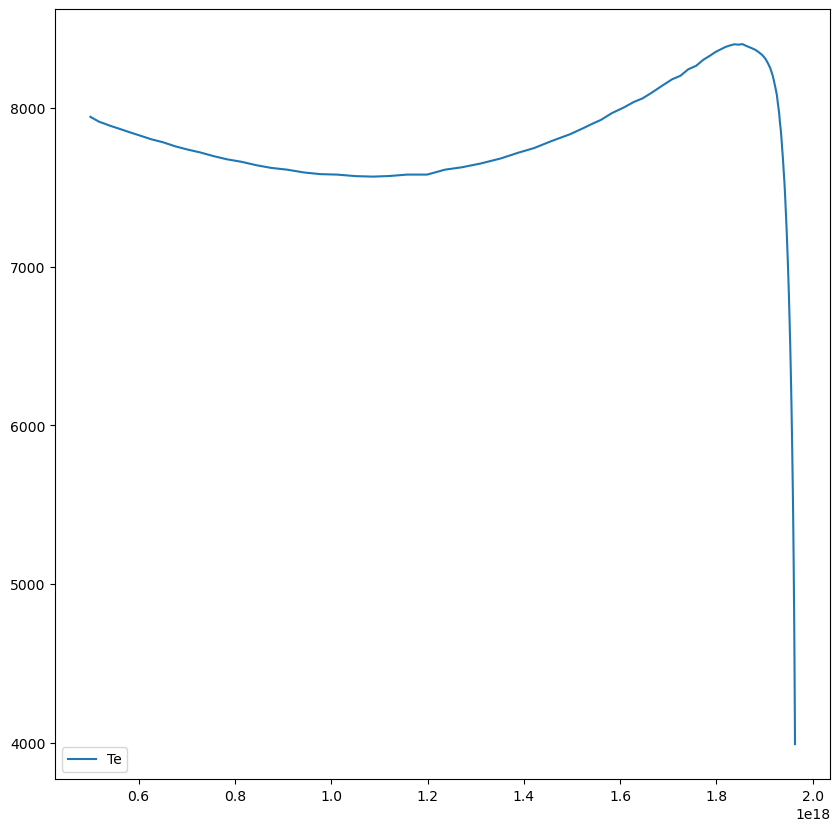

In [46]:
plt.figure(figsize=(10,10))
plt.plot(Mod.radius, Mod.te, label = 'Te')
plt.legend(loc=3);

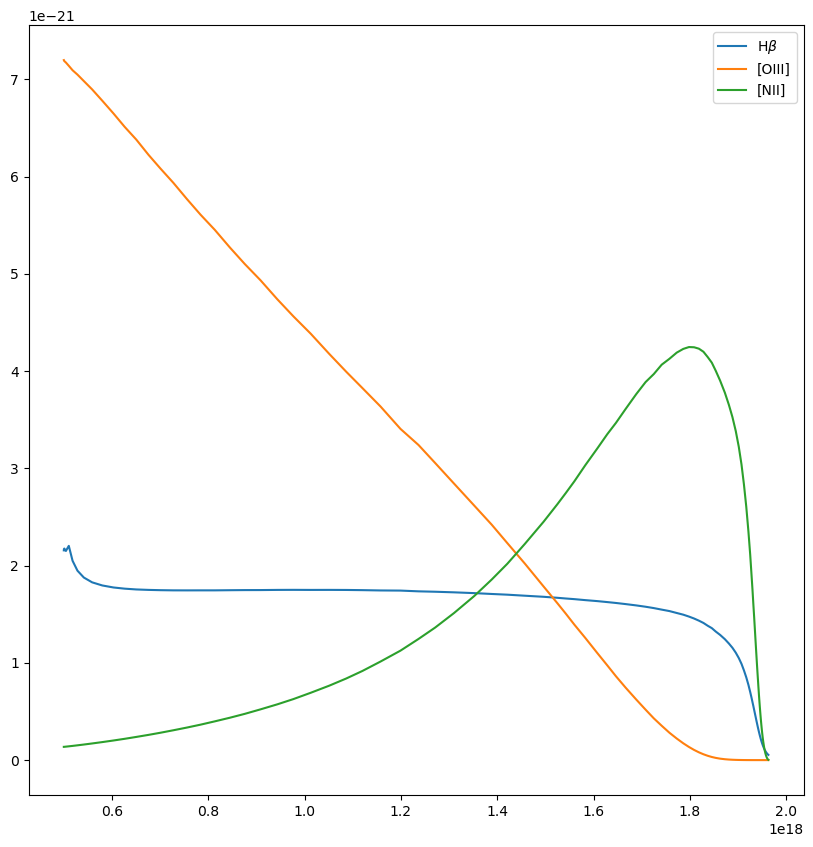

In [50]:
plt.figure(figsize=(10,10))
plt.plot(Mod.radius, Mod.get_emis('H__1_486132A'), label = r'H$\beta$')
plt.plot(Mod.radius, Mod.get_emis('O__3_500684A'), label = '[OIII]')
plt.plot(Mod.radius, Mod.get_emis('N__2_658345A'), label = '[NII]')
plt.legend();

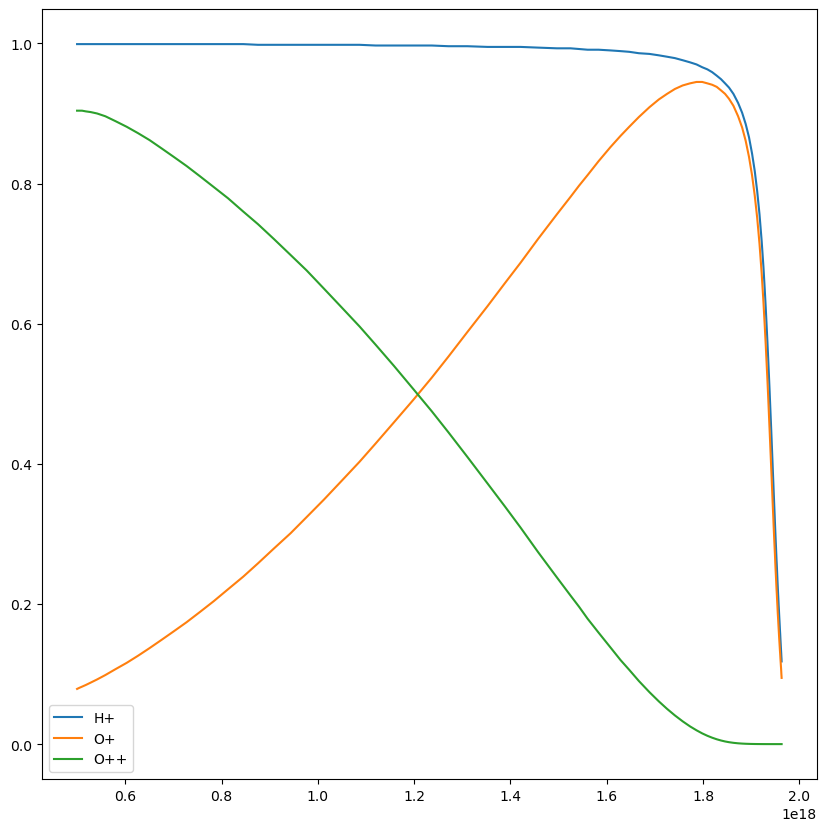

In [51]:
plt.figure(figsize=(10,10))
plt.plot(Mod.radius, Mod.get_ionic('H', 1), label = 'H+')
plt.plot(Mod.radius, Mod.get_ionic('O', 1), label = 'O+')
plt.plot(Mod.radius, Mod.get_ionic('O', 2), label = 'O++')
plt.legend(loc=3);

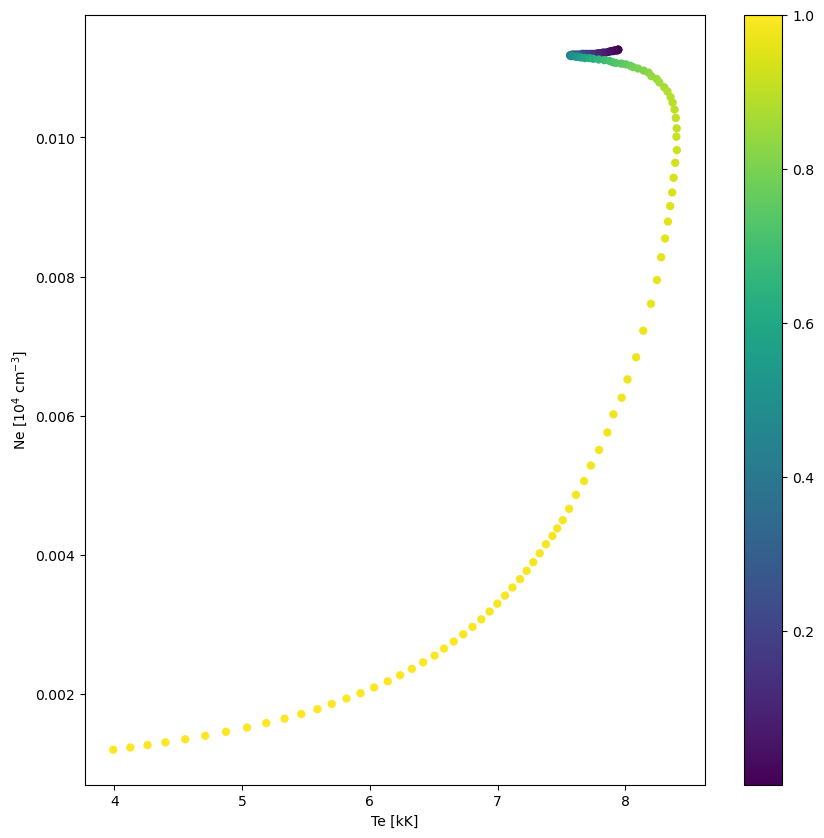

In [52]:
plt.figure(figsize=(10,10))
plt.scatter(Mod.te/1e3, Mod.ne/1e4, c = Mod.depth/np.max(Mod.depth), edgecolors = 'none')
plt.colorbar()
plt.xlabel('Te [kK]')
plt.ylabel(r'Ne [$10^4$ cm$^{-3}$]');

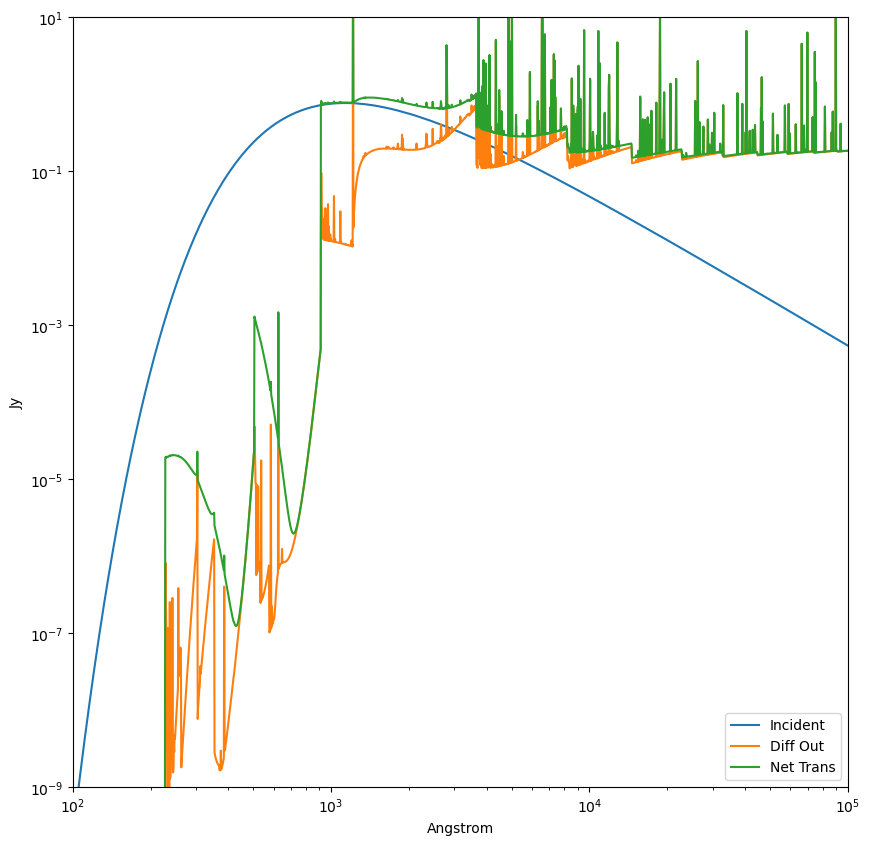

In [53]:
plt.figure(figsize=(10,10))
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'incid', unit = 'Jy'), label = 'Incident')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'diffout', unit = 'Jy'), label = 'Diff Out')
plt.loglog(Mod.get_cont_x(unit='Ang'), Mod.get_cont_y(cont = 'ntrans', unit = 'Jy'), label = 'Net Trans')
plt.xlim((100, 100000))
plt.ylim((1e-9, 1e1))
plt.xlabel('Angstrom')
plt.ylabel('Jy')
plt.legend(loc=4);